In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
bitcoin_df = pd.read_csv('Bitcoin_Data.csv')
bitcoin_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"
...,...,...,...,...,...,...,...
1787,"Oct 22, 2019","8,243.40","8,296.65","8,074.46","8,078.20","8,078.20","16,803,377,857"
1788,"Oct 21, 2019","8,225.12","8,296.69","8,196.42","8,243.72","8,243.72","15,868,748,866"
1789,"Oct 20, 2019","7,997.81","8,281.82","7,949.44","8,222.08","8,222.08","15,504,249,442"
1790,"Oct 19, 2019","7,973.80","8,082.63","7,944.78","7,988.56","7,988.56","13,797,825,640"


In [4]:
bitcoin_df.info()
bitcoin_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1792 non-null   object
 1   Open       1792 non-null   object
 2   High       1792 non-null   object
 3   Low        1792 non-null   object
 4   Close      1792 non-null   object
 5   Adj Close  1792 non-null   object
 6   Volume     1792 non-null   object
dtypes: object(7)
memory usage: 98.1+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
count,1792,1792,1792,1792,1792,1792,1792
unique,1792,1791,1792,1791,1792,1792,1792
top,"Nov 26, 2019","7,410.45","7,320.23","27,375.60","7,218.37","7,218.37","21,129,505,542"
freq,1,2,1,2,1,1,1


In [5]:
bitcoin_df['Close'].equals(bitcoin_df['Adj Close'])

True

In [6]:
bitcoin_df = bitcoin_df.drop("Adj Close", axis=1)
float_cols = bitcoin_df.drop(columns='Date').columns.tolist()
float_cols

['Open', 'High', 'Low', 'Close', 'Volume']

In [7]:
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
for col in float_cols:
    bitcoin_df[col] = bitcoin_df[col].str.replace(',', '').astype(float)
bitcoin_df.info()
bitcoin_df[float_cols].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1792 non-null   datetime64[ns]
 1   Open    1792 non-null   float64       
 2   High    1792 non-null   float64       
 3   Low     1792 non-null   float64       
 4   Close   1792 non-null   float64       
 5   Volume  1792 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 84.1 KB


,Open,High,Low,Close,Volume
count,1792.000000,1792.000000,1792.000000,1792.000000,1.792000e+03
mean,32420.744799,33138.309581,31655.461847,32446.410631,3.160910e+10
std,18459.373860,18884.410513,17976.283784,18458.010577,1.791040e+10
min,5002.580000,5331.830000,4106.980000,4970.790000,5.331173e+09
25%,17110.322500,17277.392500,16896.640000,17123.640000,2.011813e+10
50%,29355.445000,29901.055000,28961.660000,29365.535000,2.857145e+10
75%,46137.402500,47218.032500,44461.917500,46190.452500,3.868701e+10
max,73079.380000,73750.070000,71334.090000,73083.500000,3.509679e+11


In [8]:
bitcoin_df['Date'].duplicated().sum()

np.int64(0)

In [9]:
bitcoin_df = bitcoin_df.sort_values('Date').reset_index(drop=True)
bitcoin_df

,Date,Open,High,Low,Close,Volume
0,2019-10-18,8100.93,8138.41,7902.16,7973.21,1.565159e+10
1,2019-10-19,7973.80,8082.63,7944.78,7988.56,1.379783e+10
2,2019-10-20,7997.81,8281.82,7949.44,8222.08,1.550425e+10
3,2019-10-21,8225.12,8296.69,8196.42,8243.72,1.586875e+10
4,2019-10-22,8243.40,8296.65,8074.46,8078.20,1.680338e+10
...,...,...,...,...,...,...
1787,2024-09-08,54147.93,55300.86,53653.76,54841.57,1.826829e+10
1788,2024-09-09,54851.89,58041.13,54598.43,57019.54,3.461810e+10
1789,2024-09-10,57020.10,58029.98,56419.41,57648.71,2.885763e+10
1790,2024-09-11,57650.29,57991.32,55567.34,57343.17,3.704906e+10


In [18]:
outliers_IQR = pd.DataFrame()

for col in float_cols:
    Q1 = bitcoin_df[col].quantile(0.25)
    Q3 = bitcoin_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Outlier bounds for {col}: {lower_bound}, {upper_bound}")
    col_outliers = bitcoin_df[(bitcoin_df[col] < lower_bound) | (bitcoin_df[col] > upper_bound)]
    outliers_IQR = pd.concat([outliers_IQR, col_outliers])

outliers_IQR

Outlier bounds for Open: -26430.297499999993, 89678.02249999999
Outlier bounds for High: -27633.56750000001, 92128.99250000001
Outlier bounds for Low: -24451.276249999995, 85809.83374999999
Outlier bounds for Close: -26476.57875, 89790.67125
Outlier bounds for Volume: -7735191238.125, 66540324662.875


,Date,Open,High,Low,Close,Volume
147,2020-03-13,5017.83,5838.11,4106.98,5563.71,7.415677e+10
195,2020-04-30,8797.67,9440.65,8533.26,8658.55,6.696463e+10
352,2020-10-04,10550.44,10686.00,10534.39,10669.58,7.125178e+10
426,2020-12-17,21308.35,23642.66,21234.68,22805.16,7.137861e+10
442,2021-01-02,29376.46,33155.12,29091.18,32127.27,6.786542e+10
...,...,...,...,...,...,...
1601,2024-03-06,63776.05,67637.93,62848.67,66106.80,6.875023e+10
1610,2024-03-15,71387.88,72357.13,65630.70,69403.77,7.832045e+10
1614,2024-03-19,67556.13,68106.93,61536.18,61912.77,7.421584e+10
1615,2024-03-20,61930.16,68115.26,60807.79,67913.67,6.679263e+10


In [11]:
outliers_zscore = pd.DataFrame()
for col in float_cols:
    z_scores = np.abs(stats.zscore(bitcoin_df[col]))
    col_outliers = bitcoin_df[z_scores > 3]
    outliers_zscore = pd.concat([outliers_zscore, col_outliers])
outliers_zscore

,Date,Open,High,Low,Close,Volume
448,2021-01-08,39381.77,41946.74,36838.64,40797.61,8.810752e+10
451,2021-01-11,38346.53,38346.53,30549.60,35566.66,1.233206e+11
469,2021-01-29,34318.67,38406.26,32064.81,34316.39,1.178946e+11
479,2021-02-08,38886.83,46203.93,38076.32,46196.46,1.014672e+11
480,2021-02-09,46184.99,48003.72,45166.96,46481.11,9.180985e+10
481,2021-02-10,46469.76,47145.57,43881.15,44918.18,8.730109e+10
493,2021-02-22,57532.74,57533.39,48967.57,54207.32,9.205242e+10
494,2021-02-23,54204.93,54204.93,45290.59,48824.43,1.061025e+11
497,2021-02-26,47180.46,48370.79,44454.84,46339.76,3.509679e+11
548,2021-04-18,60701.89,61057.46,52829.54,56216.18,9.746887e+10


In [19]:
minmax_scaler = MinMaxScaler()
minmax_scaled_df = bitcoin_df.copy()
minmax_scaled_df[float_cols] = minmax_scaler.fit_transform(bitcoin_df[float_cols])
minmax_scaled_df

,Date,Open,High,Low,Close,Volume
0,2019-10-18,0.045513,0.041021,0.056453,0.044080,0.029859
1,2019-10-19,0.043645,0.040206,0.057087,0.044306,0.024496
2,2019-10-20,0.043998,0.043117,0.057156,0.047734,0.029433
3,2019-10-21,0.047337,0.043334,0.060830,0.048052,0.030487
4,2019-10-22,0.047605,0.043334,0.059016,0.045622,0.033192
...,...,...,...,...,...,...
1787,2024-09-08,0.721910,0.730347,0.737006,0.732180,0.037430
1788,2024-09-09,0.732251,0.770398,0.751058,0.764156,0.084733
1789,2024-09-10,0.764101,0.770235,0.778145,0.773393,0.068067
1790,2024-09-11,0.773358,0.769670,0.765470,0.768908,0.091767


In [20]:
standard_scaler = StandardScaler()
standard_scaled_df = bitcoin_df.copy()
standard_scaled_df[float_cols] = standard_scaler.fit_transform(bitcoin_df[float_cols])
standard_scaled_df

,Date,Open,High,Low,Close,Volume
0,2019-10-18,-1.317846,-1.324207,-1.321738,-1.326255,-0.891212
1,2019-10-19,-1.324734,-1.327162,-1.319366,-1.325423,-0.994743
2,2019-10-20,-1.323433,-1.316611,-1.319107,-1.312768,-0.899441
3,2019-10-21,-1.311116,-1.315824,-1.305364,-1.311596,-0.879084
4,2019-10-22,-1.310125,-1.315826,-1.312150,-1.320566,-0.826886
...,...,...,...,...,...,...
1787,2024-09-08,1.177356,1.173917,1.224082,1.213642,-0.745072
1788,2024-09-09,1.215502,1.319065,1.276647,1.331671,0.168050
1789,2024-09-10,1.332993,1.318475,1.377974,1.365767,-0.153667
1790,2024-09-11,1.367142,1.316427,1.330562,1.349209,0.303817


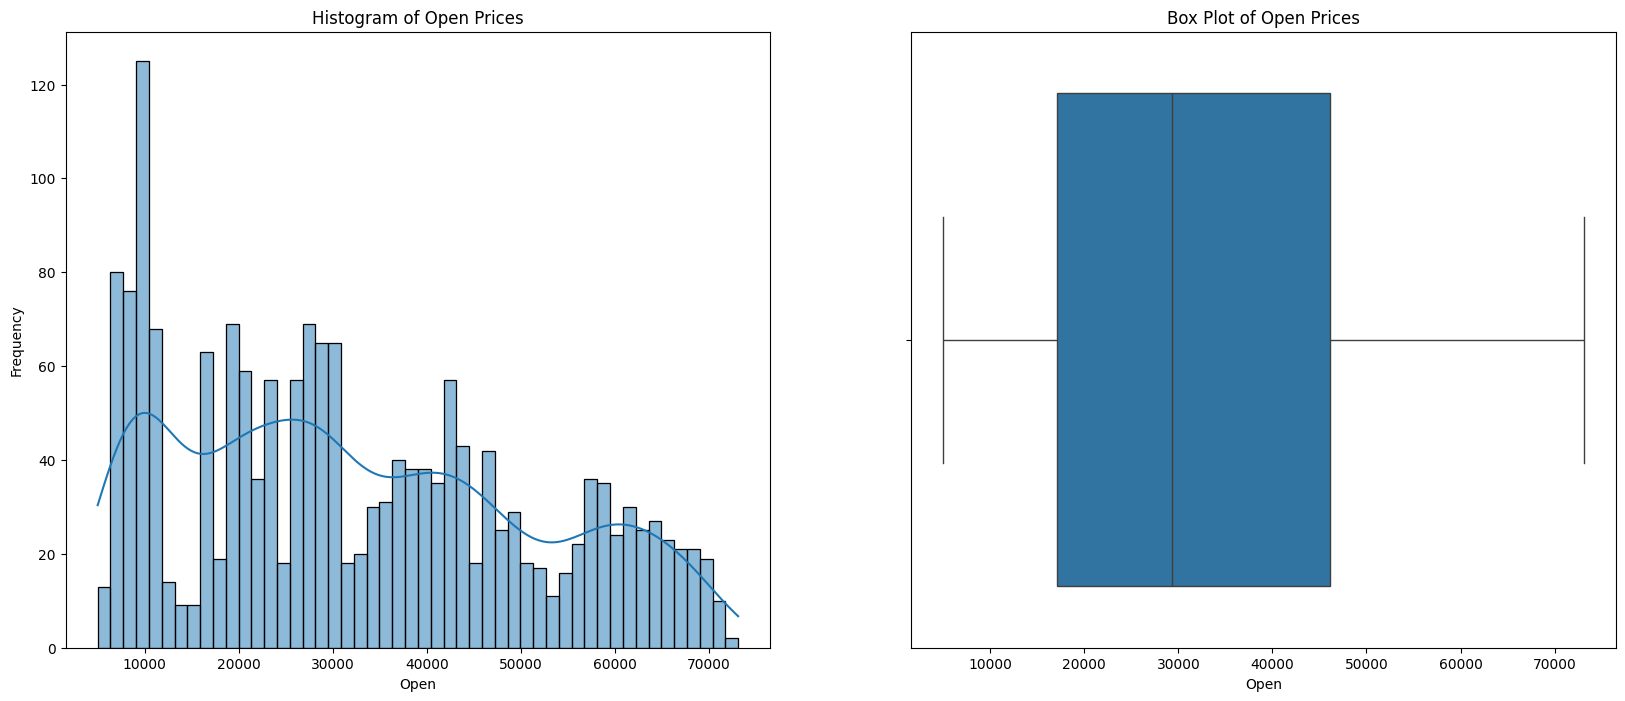

In [21]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(bitcoin_df['Open'], bins=50, kde=True)
plt.title('Histogram of Open Prices')
plt.xlabel('Open')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=bitcoin_df['Open'])
plt.title('Box Plot of Open Prices')
plt.xlabel('Open')

plt.show()

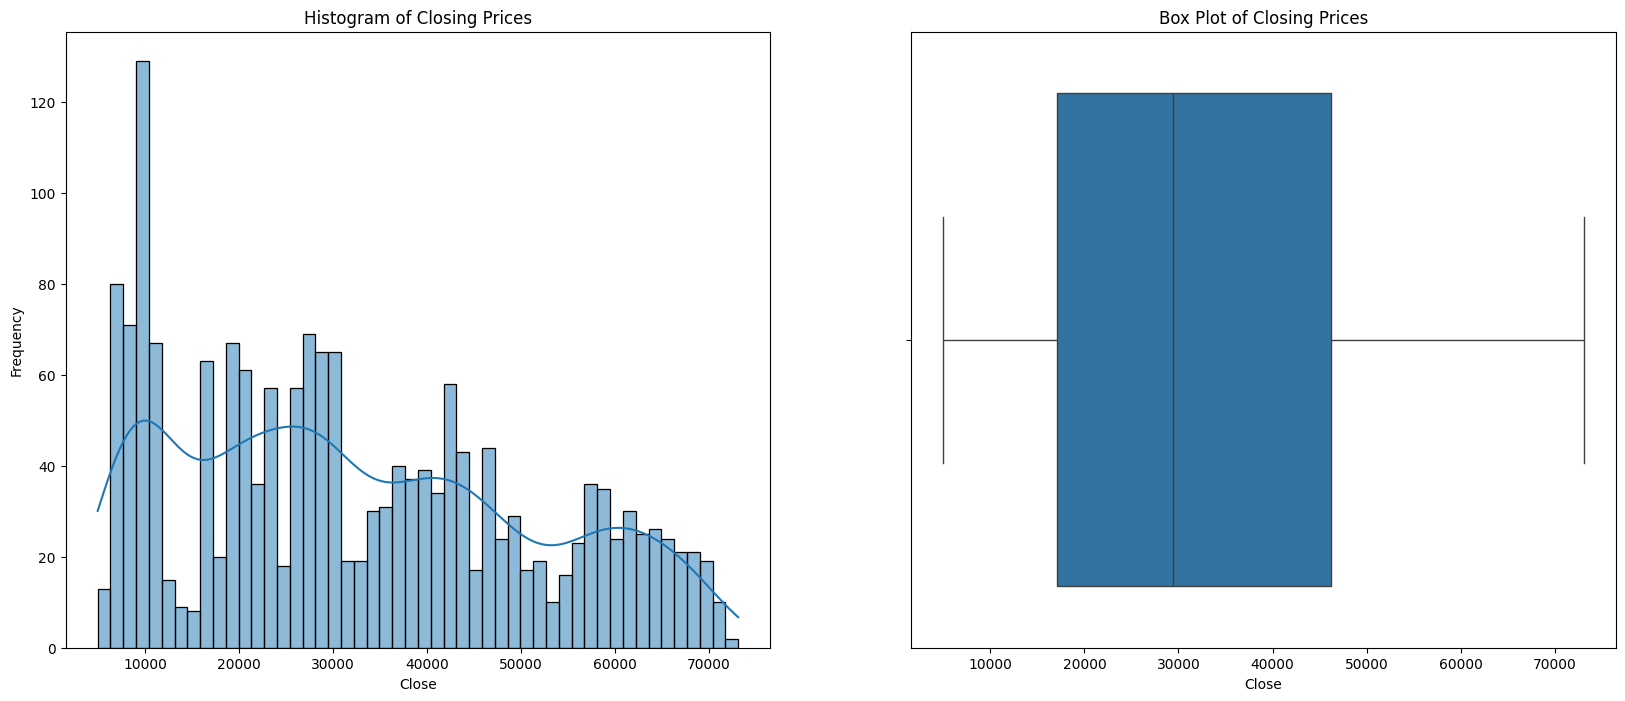

In [22]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(bitcoin_df['Close'], bins=50, kde=True)
plt.title('Histogram of Closing Prices')
plt.xlabel('Close')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=bitcoin_df['Close'])
plt.title('Box Plot of Closing Prices')
plt.xlabel('Close')

plt.show()

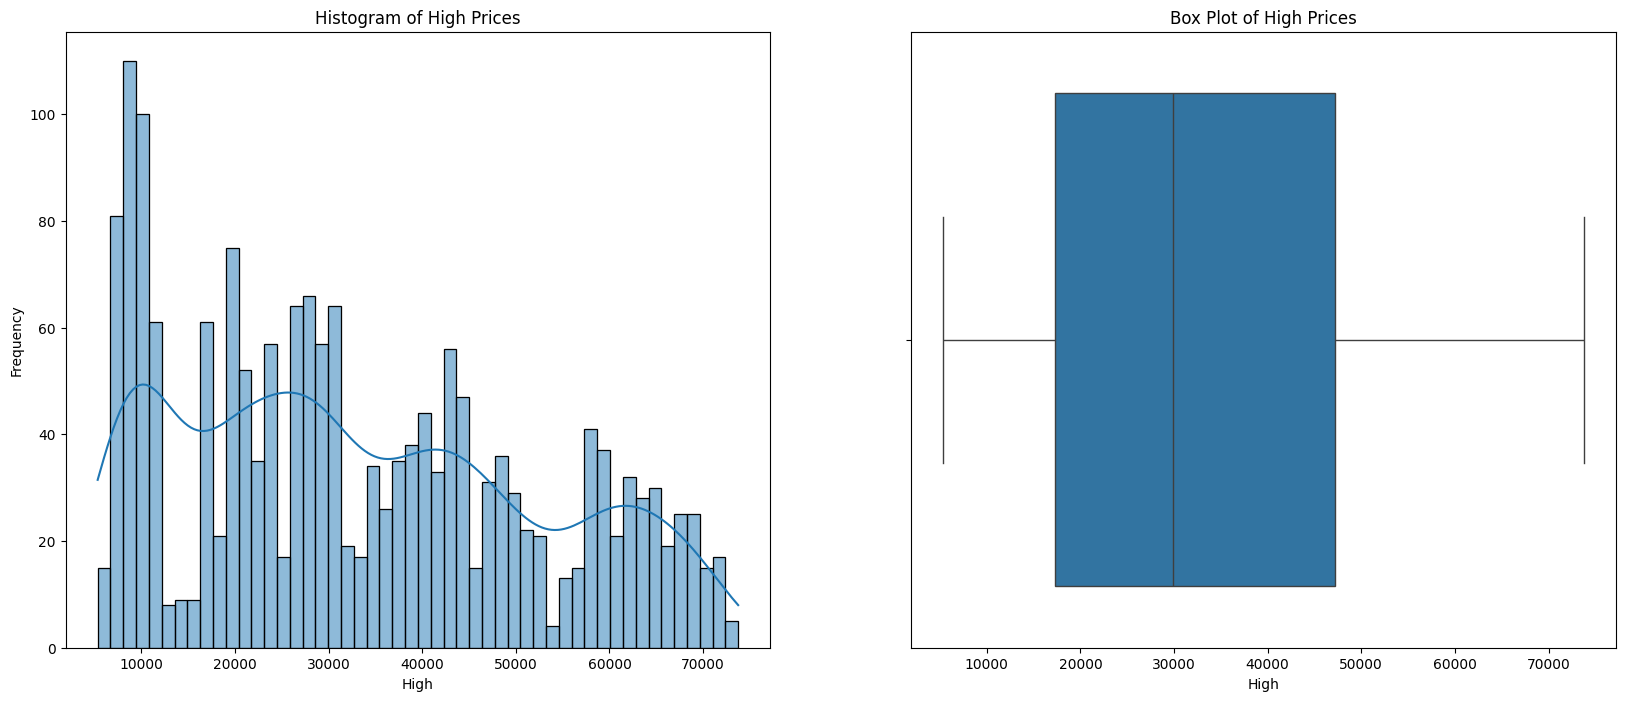

In [23]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(bitcoin_df['High'], bins=50, kde=True)
plt.title('Histogram of High Prices')
plt.xlabel('High')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=bitcoin_df['High'])
plt.title('Box Plot of High Prices')
plt.xlabel('High')

plt.show()

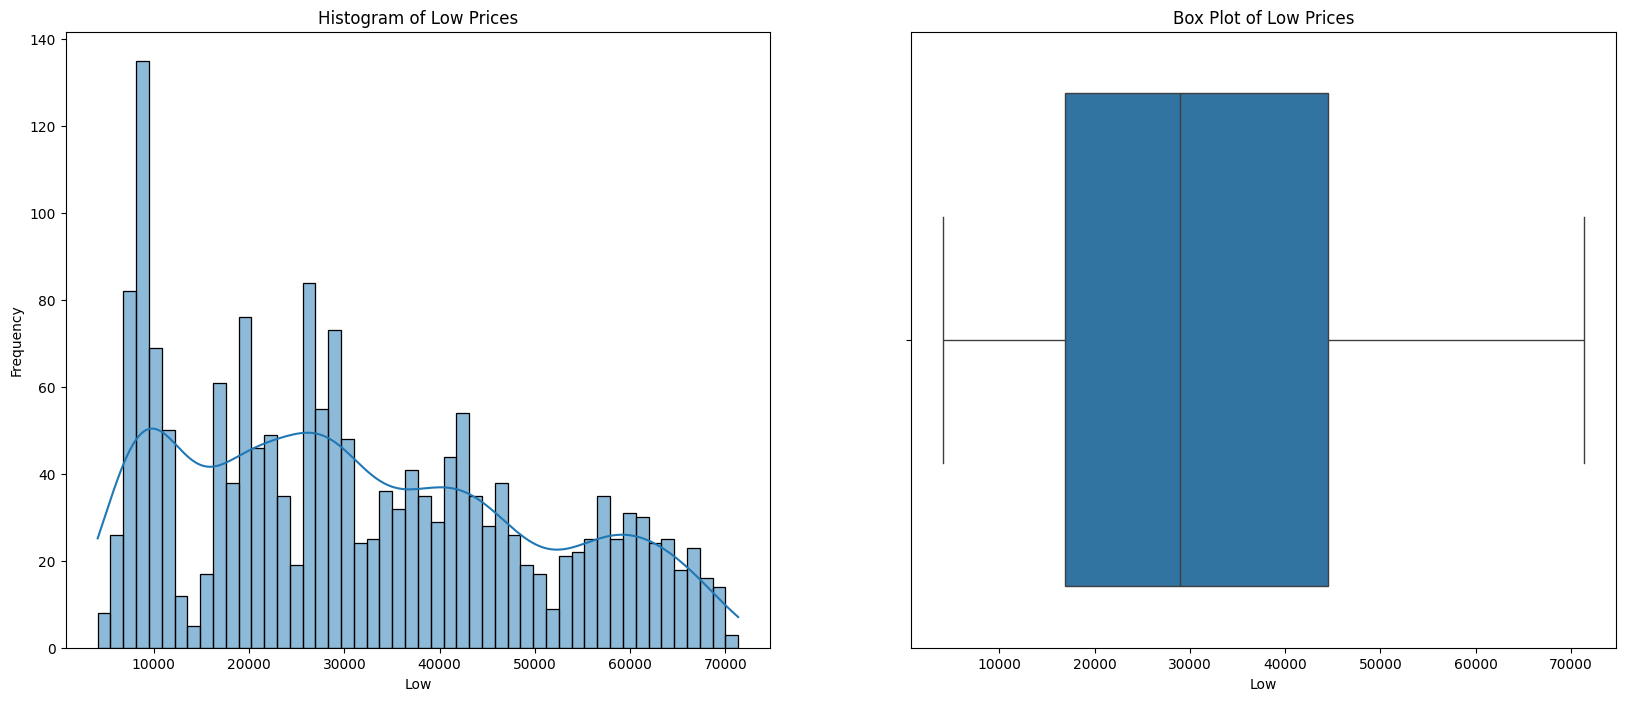

In [24]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(bitcoin_df['Low'], bins=50, kde=True)
plt.title('Histogram of Low Prices')
plt.xlabel('Low')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=bitcoin_df['Low'])
plt.title('Box Plot of Low Prices')
plt.xlabel('Low')

plt.show()

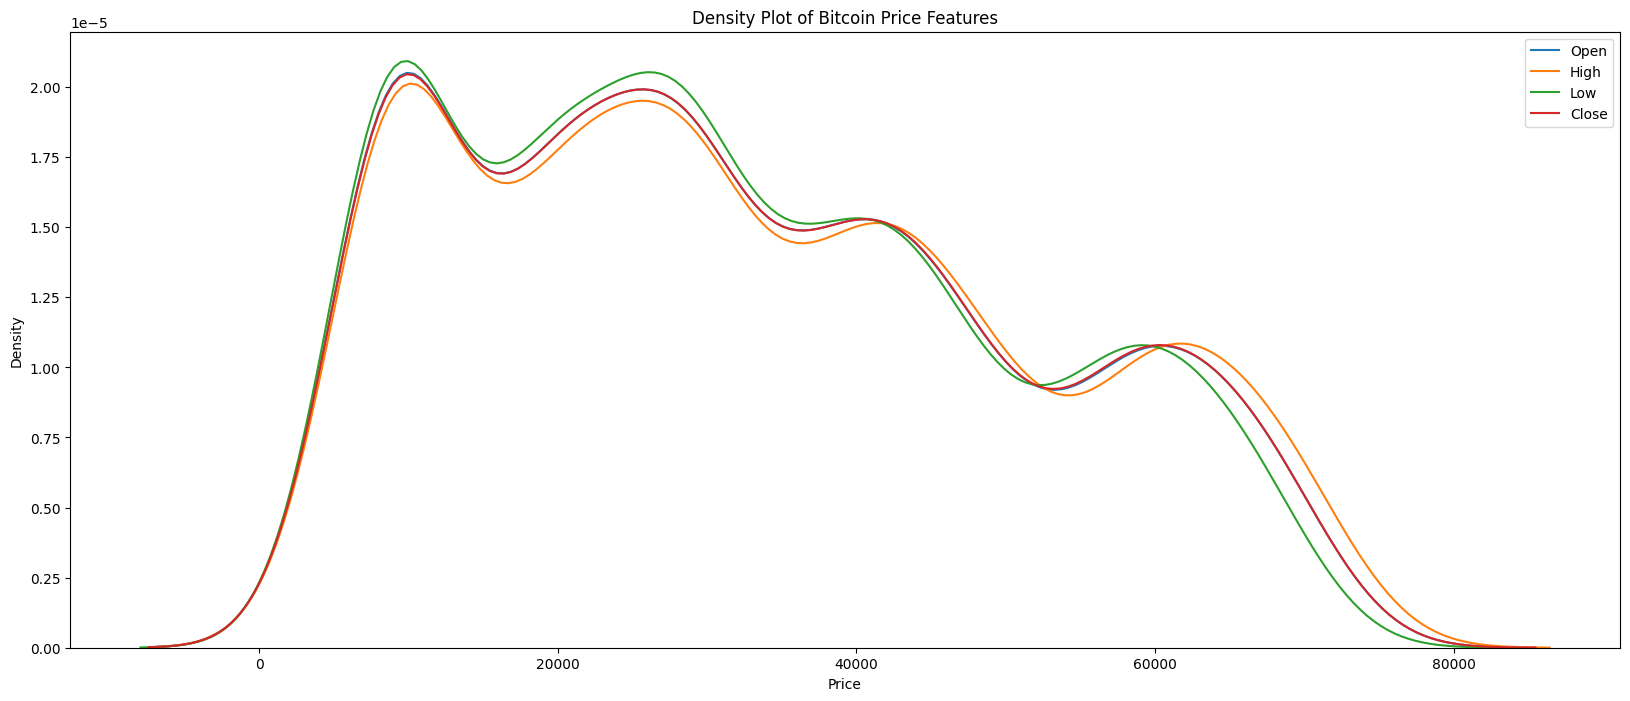

In [25]:
plt.figure(figsize=(20, 8))
for col in ['Open', 'High', 'Low', 'Close']:
    sns.kdeplot(bitcoin_df[col], label=col)
plt.title('Density Plot of Bitcoin Price Features')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

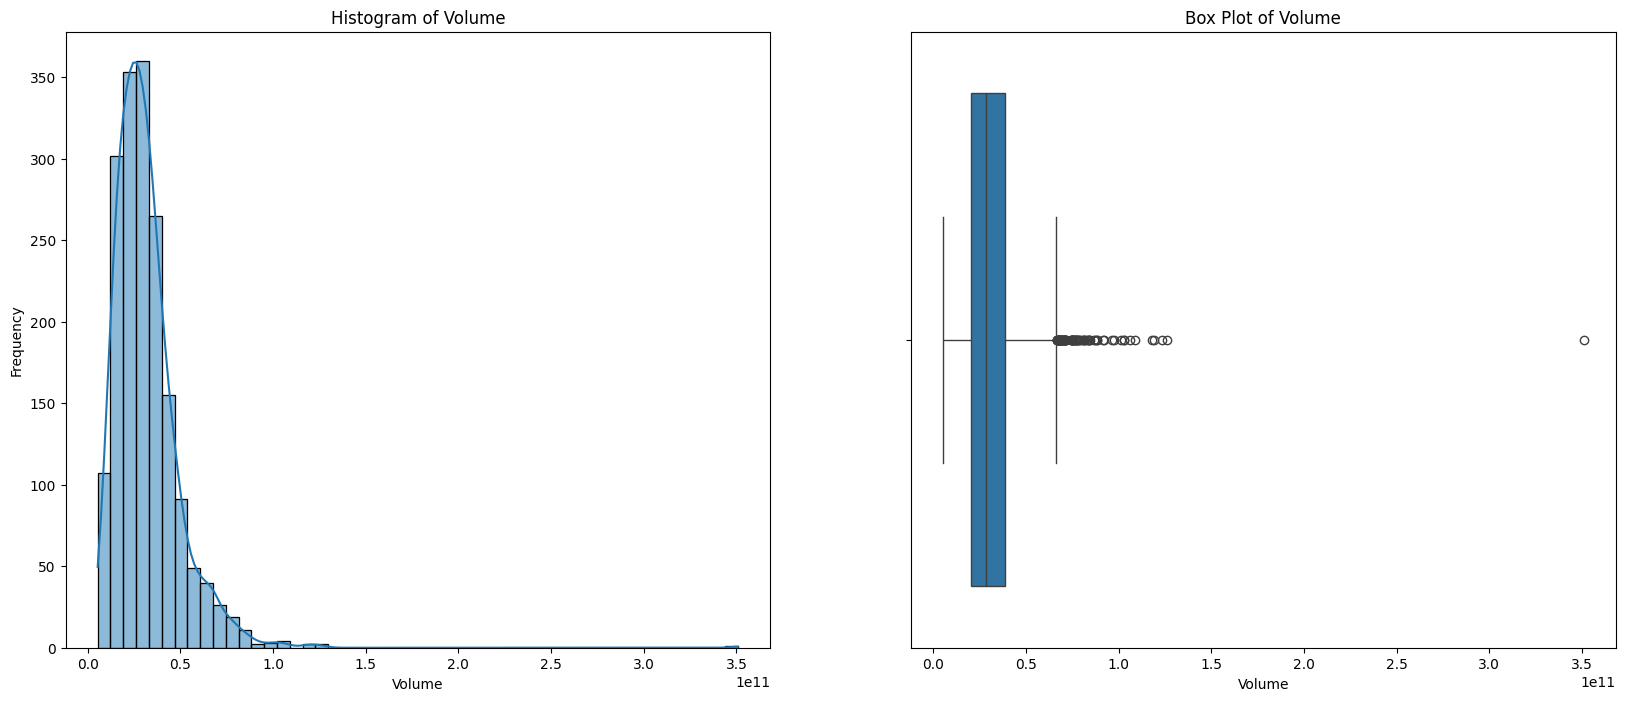

In [26]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(bitcoin_df['Volume'], bins=50, kde=True)
plt.title('Histogram of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=bitcoin_df['Volume'])
plt.title('Box Plot of Volume')
plt.xlabel('Volume')

plt.show()

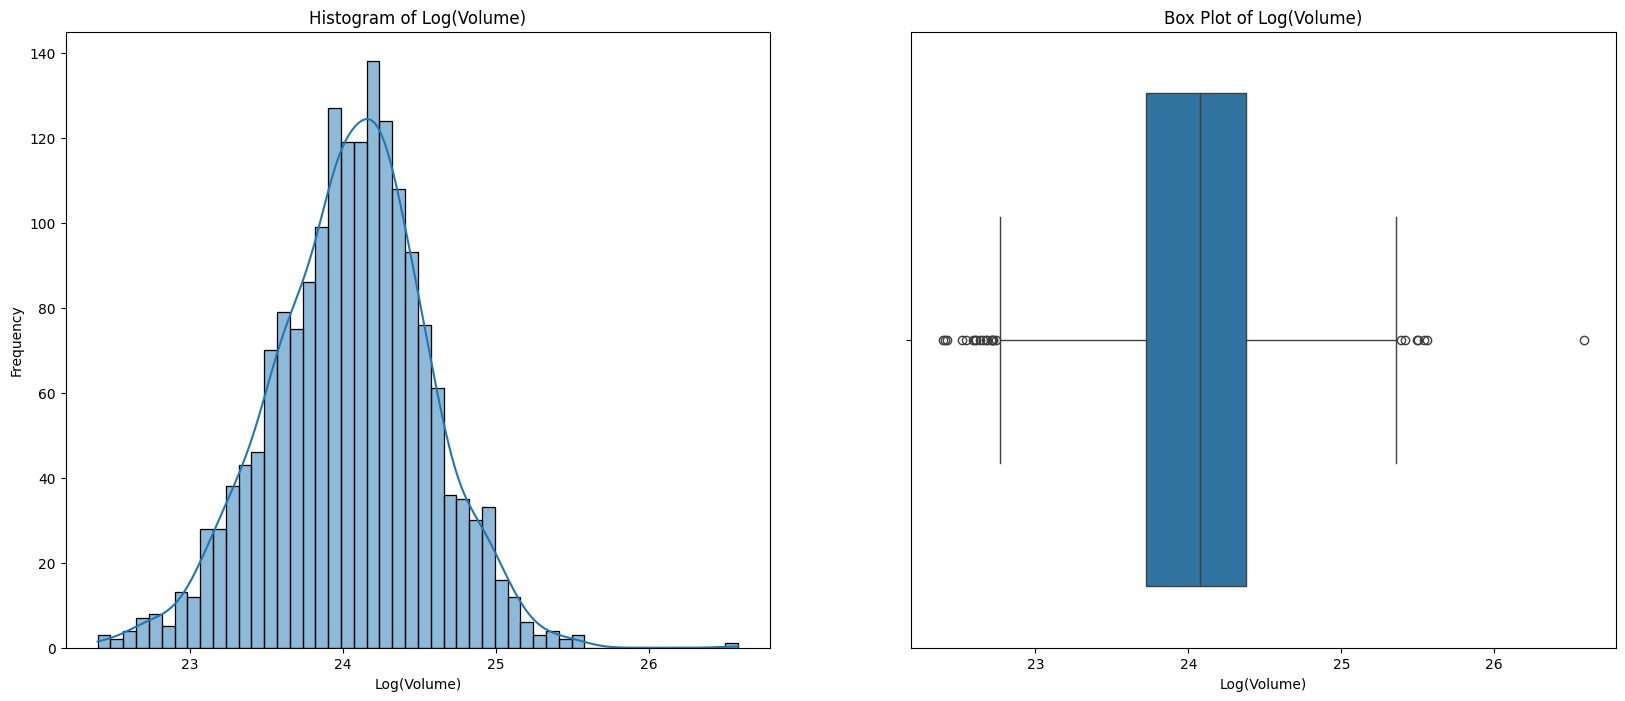

In [27]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(np.log1p(bitcoin_df['Volume']), bins=50, kde=True)
plt.title('Histogram of Log(Volume)')
plt.xlabel('Log(Volume)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(bitcoin_df['Volume']))
plt.title('Box Plot of Log(Volume)')
plt.xlabel('Log(Volume)')

plt.show()

In [28]:
bitcoin_df["Log Volume"] = np.log1p(bitcoin_df['Volume'])
bitcoin_df.info()
bitcoin_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1792 non-null   datetime64[ns]
 1   Open        1792 non-null   float64       
 2   High        1792 non-null   float64       
 3   Low         1792 non-null   float64       
 4   Close       1792 non-null   float64       
 5   Volume      1792 non-null   float64       
 6   Log Volume  1792 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 98.1 KB


,Date,Open,High,Low,Close,Volume,Log Volume
count,1792,1792.000000,1792.000000,1792.000000,1792.000000,1.792000e+03,1792.000000
mean,2022-03-31 12:00:00,32420.744799,33138.309581,31655.461847,32446.410631,3.160910e+10,24.048839
min,2019-10-18 00:00:00,5002.580000,5331.830000,4106.980000,4970.790000,5.331173e+09,22.396837
25%,2021-01-07 18:00:00,17110.322500,17277.392500,16896.640000,17123.640000,2.011813e+10,23.724887
50%,2022-03-31 12:00:00,29355.445000,29901.055000,28961.660000,29365.535000,2.857145e+10,24.075674
75%,2023-06-22 06:00:00,46137.402500,47218.032500,44461.917500,46190.452500,3.868701e+10,24.378770
max,2024-09-12 00:00:00,73079.380000,73750.070000,71334.090000,73083.500000,3.509679e+11,26.583961
std,NaN,18459.373860,18884.410513,17976.283784,18458.010577,1.791040e+10,0.507509


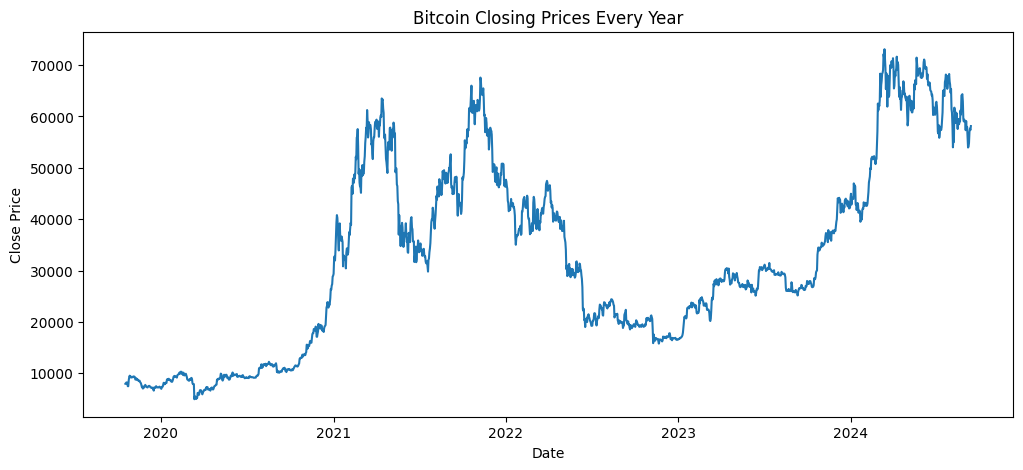

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(bitcoin_df['Date'], bitcoin_df['Close'])
plt.title('Bitcoin Closing Prices Every Year')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

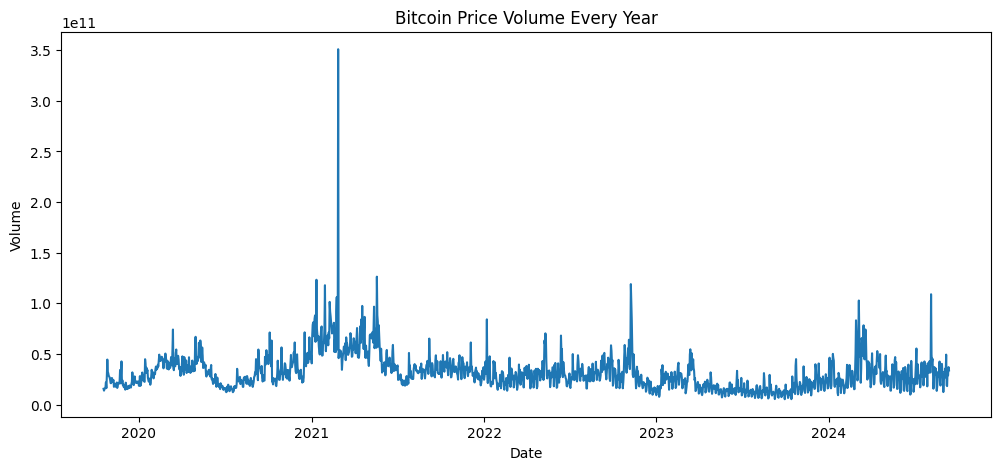

In [64]:
plt.figure(figsize=(12, 5))
plt.plot(bitcoin_df['Date'], bitcoin_df['Volume'], label='Close Price')
plt.title('Bitcoin Price Volume Every Year')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

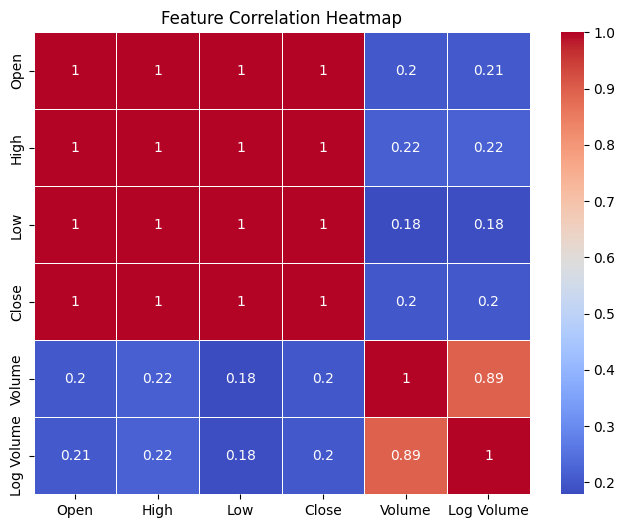

In [65]:
correlation_matrix = bitcoin_df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

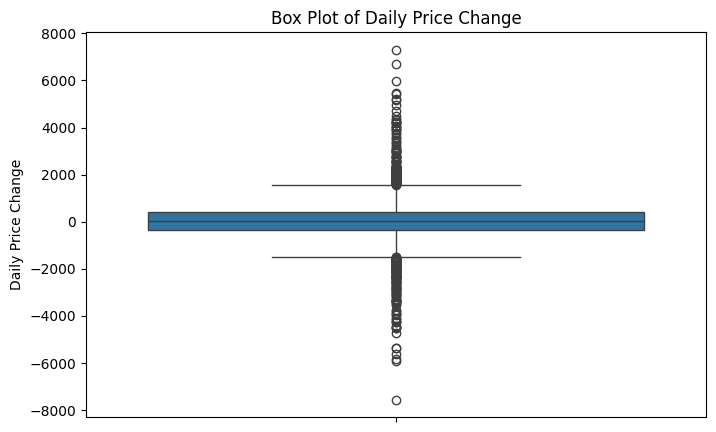

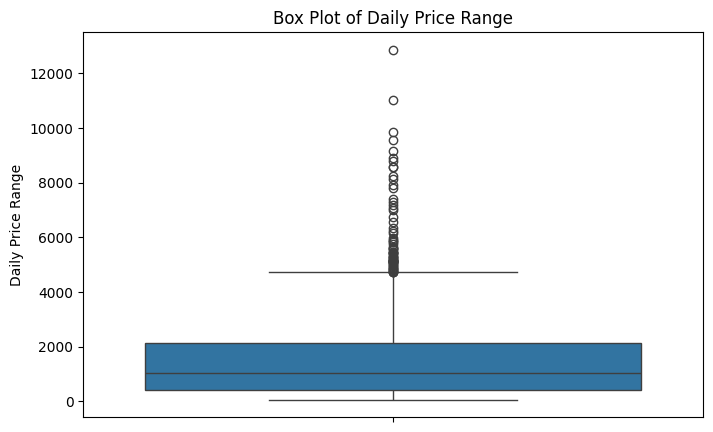

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=(bitcoin_df['Close'] - bitcoin_df['Open']))
plt.title('Box Plot of Daily Price Change')
plt.ylabel('Daily Price Change')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=(bitcoin_df['High'] - bitcoin_df['Low']))
plt.title('Box Plot of Daily Price Range')
plt.ylabel('Daily Price Range')
plt.show()

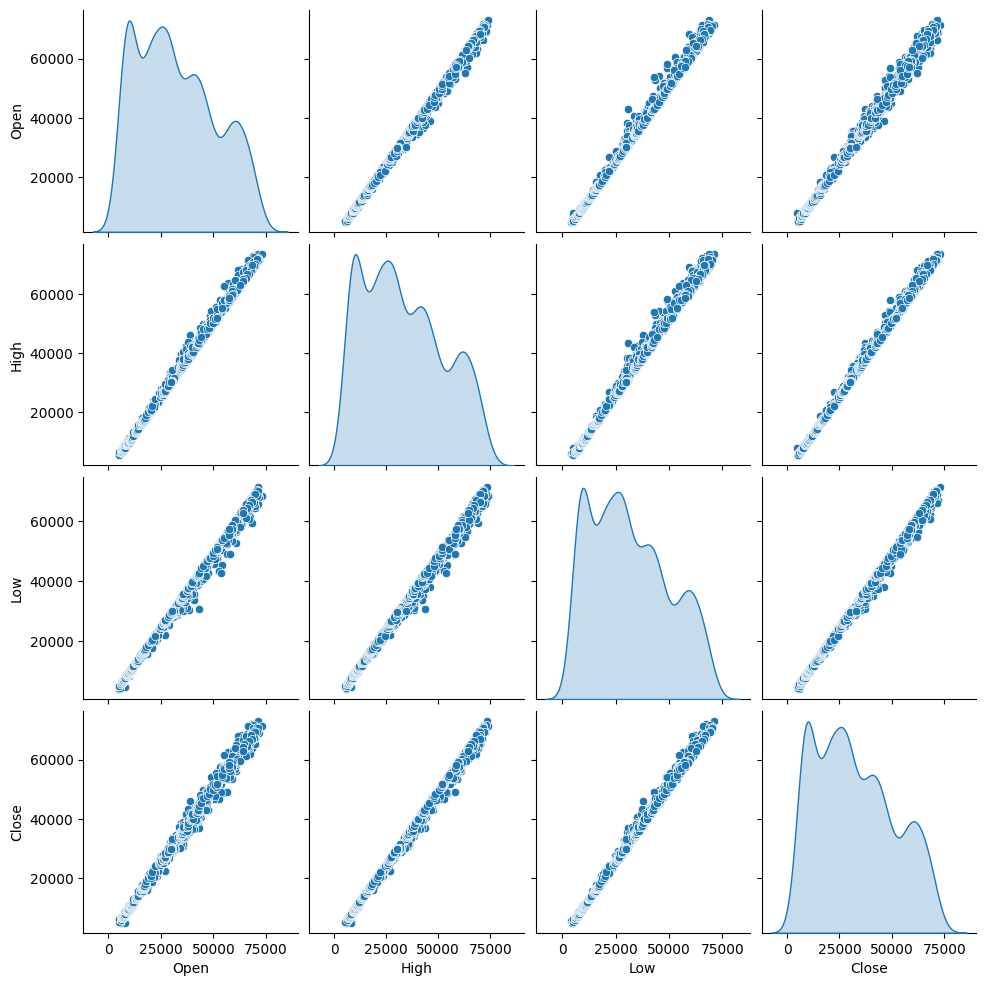

In [54]:
sns.pairplot(bitcoin_df[['Open', 'High', 'Low', 'Close']], diag_kind='kde')
plt.show()

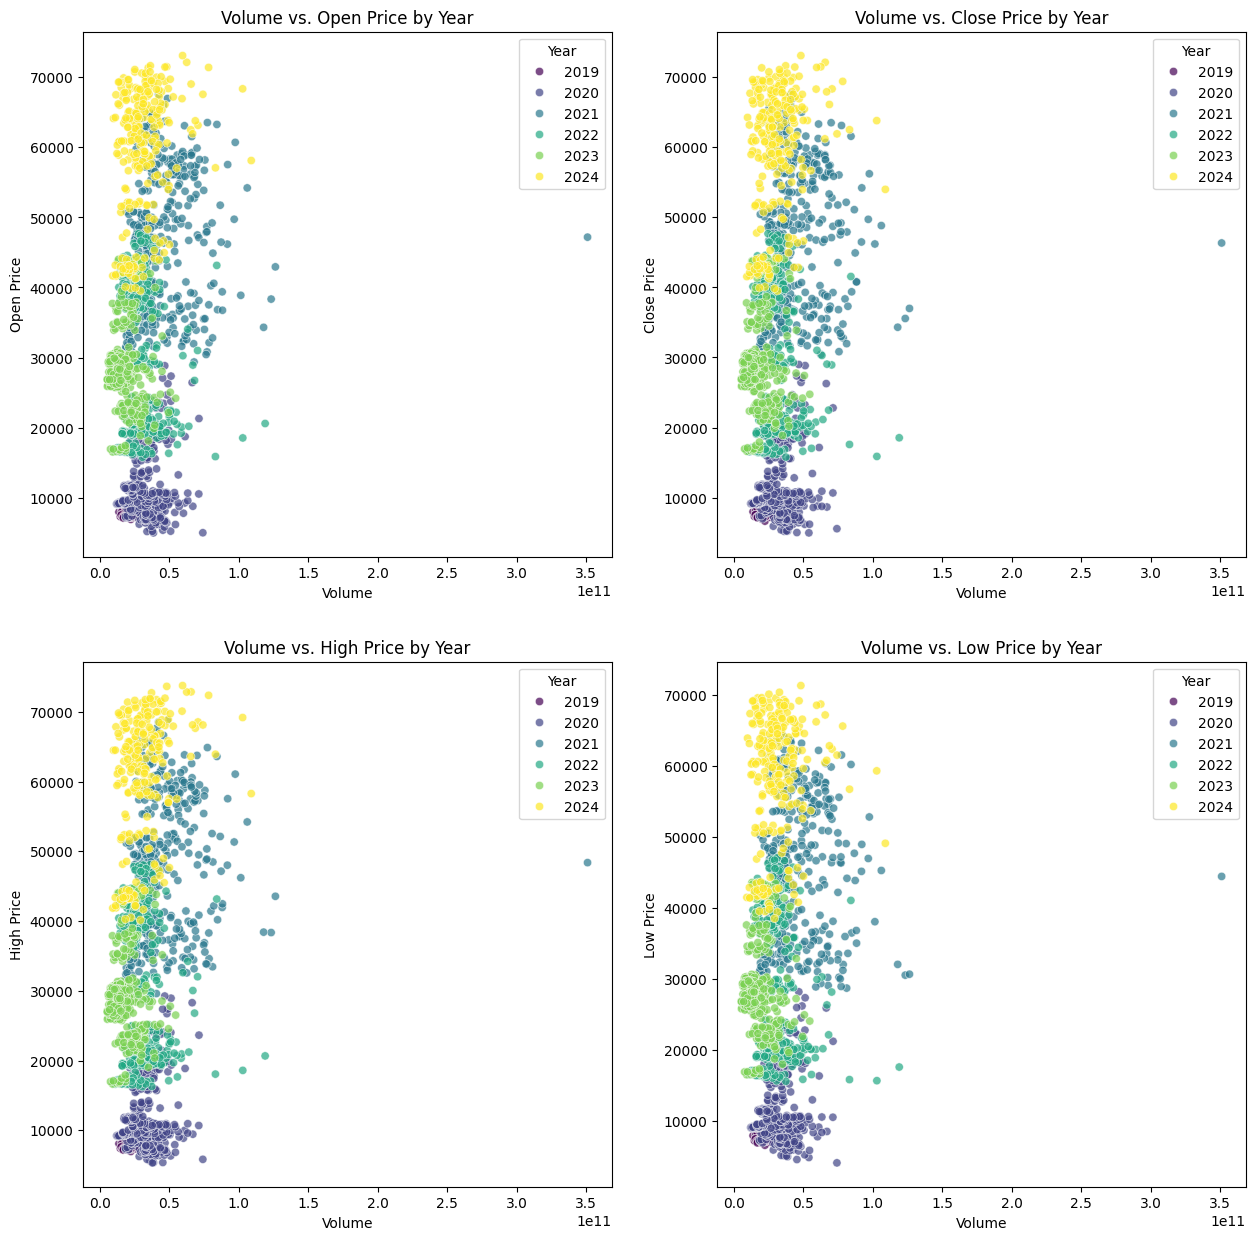

In [60]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Volume', y='Open', hue=bitcoin_df['Date'].dt.year, data=bitcoin_df, palette='viridis', alpha=0.7)
plt.title('Volume vs. Open Price by Year')
plt.xlabel('Volume')
plt.ylabel('Open Price')
plt.legend(title='Year')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Volume', y='Close', hue=bitcoin_df['Date'].dt.year, data=bitcoin_df, palette='viridis', alpha=0.7)
plt.title('Volume vs. Close Price by Year')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.legend(title='Year')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Volume', y='High', hue=bitcoin_df['Date'].dt.year, data=bitcoin_df, palette='viridis', alpha=0.7)
plt.title('Volume vs. High Price by Year')
plt.xlabel('Volume')
plt.ylabel('High Price')
plt.legend(title='Year')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Volume', y='Low', hue=bitcoin_df['Date'].dt.year, data=bitcoin_df, palette='viridis', alpha=0.7)
plt.title('Volume vs. Low Price by Year')
plt.xlabel('Volume')
plt.ylabel('Low Price')
plt.legend(title='Year')

plt.show()

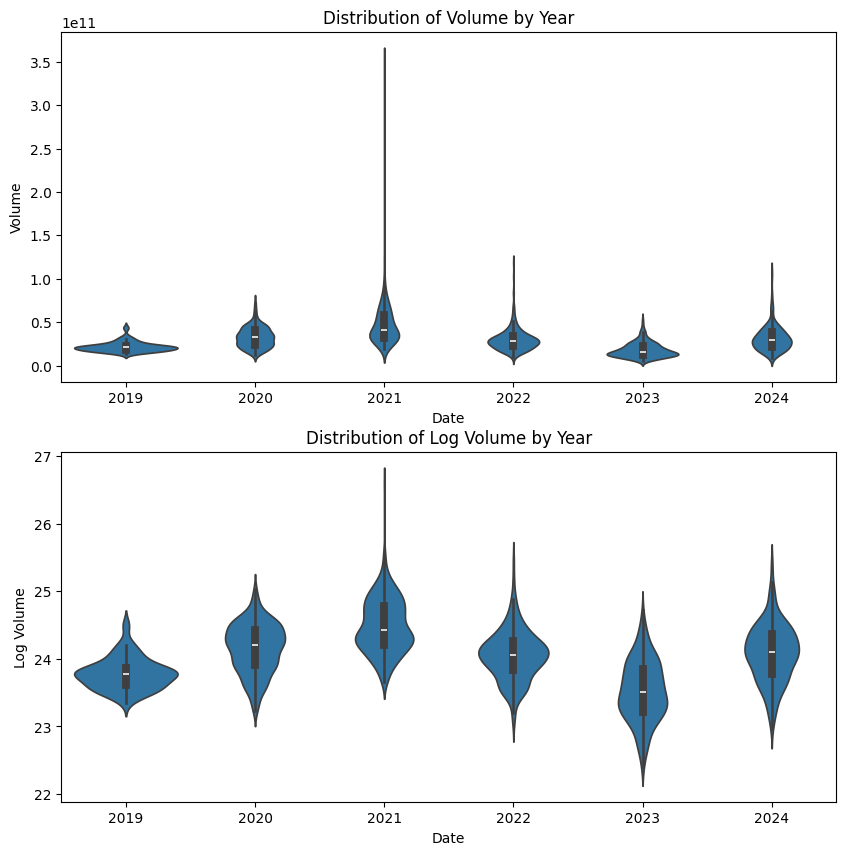

In [53]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.violinplot(x=bitcoin_df['Date'].dt.year, y=bitcoin_df['Volume'], data=bitcoin_df)
plt.title('Distribution of Volume by Year')

plt.subplot(2, 1, 2)
sns.violinplot(x=bitcoin_df['Date'].dt.year, y=bitcoin_df['Log Volume'], data=bitcoin_df)
plt.title('Distribution of Log Volume by Year')

plt.show()